# Productos Financieros

Alan Cardenas  27/abril/2020

Este proyecto esta dedicado a realizar una comparacion de los rendimientos en el ultimo año de fondos de inversíon, acciones, indices y algunos rendimientos de proyectos en la industria fintech.

Tambien se incluira un modelo predictivo para analizar el comportamiento del S&P 500.

![tittle](Images/risk2.jpg)

### **Paqueterias y herramientas**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf

**Databases**

Indices

In [2]:
ipc_mes = pd.read_csv('IPC_mensual.csv')
ipc_dia = pd.read_csv('IPC_diario.csv')
sp500_mes = pd.read_csv('S&P500_mensual.csv')
sp500_dia = pd.read_csv('S&P500_diario.csv')

Fondos de inversion y fintech

In [3]:
bbva = pd.read_csv('bbva_mensual.csv')
hsbc = pd.read_csv('hsbc_mensual.csv')
maya = pd.read_csv('maya_mensual.csv')
rvtec = pd.read_csv('rvtec_mensual.csv')
latin9 = pd.read_csv('latin9_mensual.csv')
fondos_rend = pd.read_csv('fondos_rend.csv')
fintech_rend= pd.read_csv('fintech_rend.csv')

FAANG

In [4]:
faang_rend= pd.read_csv('faang_rend.csv')

## Comparativos

In [5]:
def grafobarra(axs, caracteristica_x, caracteristica_y):
    columnas = fondos_rend.columns
    print("Plotteando: "+columnas[caracteristica_x]+"(X) vs "+columnas[caracteristica_y]+"(Y)")

    graff = axs.bar(fondos_rend.iloc[:,caracteristica_x],fondos_rend.iloc[:,caracteristica_y],label = 'rendimientos',
            color=['orange', 'red', 'green', 'pink', 'blue','black'])
    
    bar_label = fondos_rend.iloc[:,caracteristica_y]
    for idx,rect in enumerate(graff):
        height = rect.get_height()
        axs.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0,color='purple')
    
    
    axs.set_xlabel(columnas[caracteristica_x])
    axs.set_ylabel(columnas[caracteristica_y])

### IPC vs Fondos de inversion.

![tittle](Images/fondos.jfif)

Plotteando: Fondos(X) vs rend_feb(Y)
Plotteando: Fondos(X) vs rend_abril(Y)


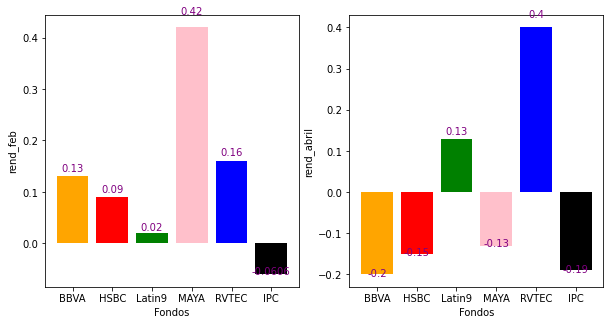

In [6]:
fig, axs = plt.subplots(1, 2,figsize=(10,5))

caracteristica_x = 0
caracteristica_y = 1
grafobarra(axs[0],caracteristica_x, caracteristica_y)

caracteristica_x = 0
caracteristica_y = 2
grafobarra(axs[1],caracteristica_x, caracteristica_y)

Funcion para calcular variacion en rendimientos

In [7]:
def porcentajes(array):
    cambio = [0]
    for num in range(len(array) - 1):
        cambio.append(round((array[num + 1] / array[num])-1,4))
    cambio[0] = np.nanmean(cambio)
    return cambio

Agregar variacion a todos los DF.

In [8]:
bbva['var%'] = porcentajes(bbva['Cierre'])
hsbc['var%'] = porcentajes(hsbc['Cierre'])
maya['var%'] = porcentajes(maya['Cierre'])
rvtec['var%'] = porcentajes(rvtec['Cierre'])
latin9['var%'] = porcentajes(latin9['Cierre'])

**Estadisticos basicos**

In [9]:
def datos_estadisticos(array):
    result1= np.where(array == min(array.loc[:,'var%']))
    result2= np.where(array == max(array.loc[:,'var%']))
    print("rendimiento minimo: "+ str(min(array.loc[:,'var%'])*100)+' %'+' fecha:'+ array.iloc[result1[0][0],0])
    print("rendimiento maximo: "+ str(max(array.loc[:,'var%'])*100)+' %'+' fecha:'+ array.iloc[result2[0][0],0])
    print("rendimiento promedio: "+ str(np.mean(array.loc[:,'var%'])*100)+' %')  
        

In [10]:
datos_estadisticos(bbva)

rendimiento minimo: -22.78 % fecha:01/03/2020
rendimiento maximo: 3.6999999999999997 % fecha:01/08/2019
rendimiento promedio: -2.0646999999999998 %


In [11]:
datos_estadisticos(hsbc)

rendimiento minimo: -19.28 % fecha:01/03/2020
rendimiento maximo: 3.29 % fecha:01/09/2019
rendimiento promedio: -1.4508999999999999 %


In [12]:
datos_estadisticos(maya)

rendimiento minimo: -19.42 % fecha:01/03/2020
rendimiento maximo: 3.08 % fecha:01/08/2019
rendimiento promedio: -1.2859 %


In [13]:
datos_estadisticos(rvtec)

rendimiento minimo: -3.5999999999999996 % fecha:01/02/2020
rendimiento maximo: 19.759999999999998 % fecha:01/04/2020
rendimiento promedio: 4.0007 %


In [14]:
datos_estadisticos(latin9)

rendimiento minimo: -3.8 % fecha:01/02/2020
rendimiento maximo: 10.51 % fecha:01/04/2020
rendimiento promedio: 1.4113 %


### IPC vs Fintechs

![tittle](Images/fintech.jpg)

                  Rendimientos a febrero


Text(0, 0.5, 'rendimientos')

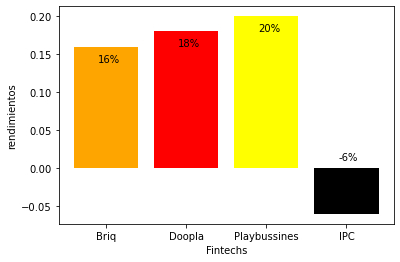

In [15]:
figsize=(10,5)
print("                  Rendimientos a febrero")


plt.bar(fintech_rend.iloc[:,0],fintech_rend.iloc[:,1],label = 'rendimientos a enero',color=['orange', 'red', 'yellow','black'])
plt.text(x = -0.1,y= 0.14, s= '16%')
plt.text(x = 0.9,y= 0.16, s= '18%')
plt.text(x = 1.9,y= 0.18, s= '20%')
plt.text(x = 2.9,y= 0.01, s= '-6%')
plt.xlabel('Fintechs')
plt.ylabel('rendimientos')

### Indices vs acciones(FAANG)

![tittle](Images/stock.jpg)

In [16]:
def autolabel1(rects):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0,color='red')
def autolabel2(rects):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax2.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0,color='red')

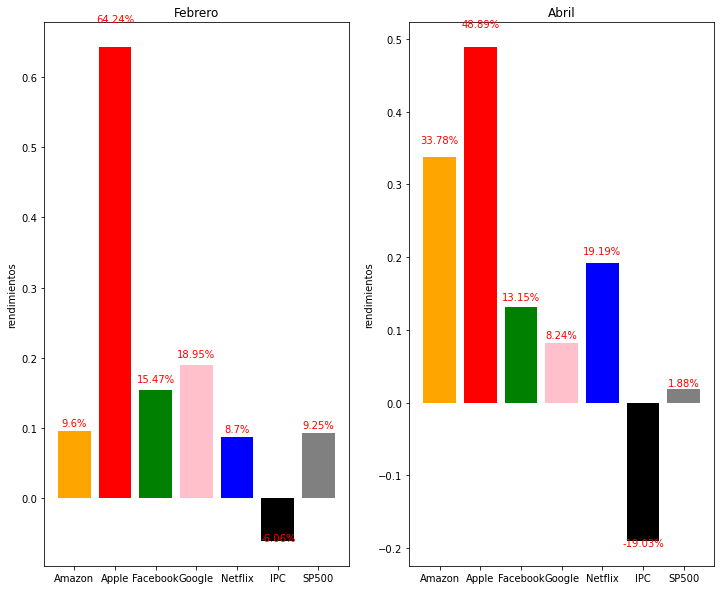

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,10))

graf1 = ax1.bar(faang_rend.iloc[:,0],faang_rend.iloc[:,1],label = 'rendimientos a febrero',
                color=['orange', 'red', 'green', 'pink', 'blue','black','gray'])
ax1.set_title('Febrero')
ax1.set_ylabel('rendimientos')


graf2 = ax2.bar(faang_rend.iloc[:,0],faang_rend.iloc[:,2],label = 'rendimientos a abril',
                color=['orange', 'red', 'green', 'pink', 'blue','black','gray'])
ax2.set_title('Abril')
ax2.set_ylabel('rendimientos')

bar_label=['9.6%','64.24%','15.47%','18.95%','8.7%','-6.06%','9.25%']
autolabel1(graf1)
bar_label=['33.78%','48.89%','13.15%','8.24%','19.19%','-19.03%','1.88%']
autolabel2(graf2)

#### Evolucíon de los rendimientos mensuales

In [18]:
def bolsainfo(stock_simbol):
    tickerData = yf.Ticker(stock_simbol)
    dfname = tickerData.history(period='1mo',interval='1mo', start='2019-04-1', end='2020-04-01')
    dfname = dfname.filter(['Close'])
    dfname = dfname.reset_index()
    dfname['var%'] = porcentajes(dfname['Close'])
    return dfname

In [19]:
amazon = bolsainfo('AMZN')
apple = bolsainfo('AAPL')
facebook = bolsainfo('FB')
google = bolsainfo('GOOG')
netflix = bolsainfo('NFLX')
sp500 = bolsainfo('^GSPC')
ipc = bolsainfo('^MXX')

amazon

,Date,Close,var%
0,2019-04-01,1926.52,0.022677
1,2019-05-01,1775.07,-0.078600
2,2019-06-01,1893.63,0.066800
3,2019-07-01,1866.78,-0.014200
4,2019-08-01,1776.29,-0.048500
5,2019-09-01,1735.91,-0.022700
6,2019-10-01,1776.66,0.023500
7,2019-11-01,1800.80,0.013600
8,2019-12-01,1847.84,0.026100
9,2020-01-01,2008.72,0.087100


In [20]:
apple = apple.drop([2, 6,10,14])
apple = apple.reindex()

#### Estadisticos

In [21]:
def datos_estadisticos2(array):
    result1= np.where(array == min(array.loc[:,'var%']))
    result2= np.where(array == max(array.loc[:,'var%']))
    result3= np.where(array == min(array.loc[:,'Close']))
    result4= np.where(array == max(array.loc[:,'Close']))
    print("rendimiento minimo:   "+ str(min(array.loc[:,'var%'])*100)+' %'+' fecha:'+ str(array.iloc[result1[0][0],0]))
    print("rendimiento maximo:   "+ str(max(array.loc[:,'var%'])*100)+' %'+' fecha:'+ str(array.iloc[result2[0][0],0]))
    print("rendimiento promedio: "+ str(np.mean(array.loc[:,'var%'])*100)+' %')
    print("precio minimo:   "+ str(min(array.loc[:,'Close']))+' fecha:'+ str(array.iloc[result3[0][0],0]))
    print("precio maximo:   "+ str(max(array.loc[:,'Close']))+' fecha:'+ str(array.iloc[result4[0][0],0]))
    print("precio promedio: "+ str(np.mean(array.loc[:,'Close'])))

In [22]:
datos_estadisticos2(amazon)

rendimiento minimo:   -7.86 % fecha:2019-05-01 00:00:00
rendimiento maximo:   26.889999999999997 % fecha:2020-04-01 00:00:00
rendimiento promedio: 2.4421301775147928 %
precio minimo:   1735.91 fecha:2019-09-01 00:00:00
precio maximo:   2474.0 fecha:2020-04-01 00:00:00
precio promedio: 1901.2069230769232


#### Graficos

In [23]:
def grafosimple(axnum,empresa,titulo,columna):
    """ex:(ax1,apple,'Apple',2) columna:1=precio,2=rendimiento"""
    axnum.plot(empresa.iloc[:,0],empresa.iloc[:,columna],color = 'r')
    axnum.set_xlabel('fecha')
    axnum.set_ylabel('Rendimiento' if columna == 2 else 'Precio')
    axnum.set_title(titulo)

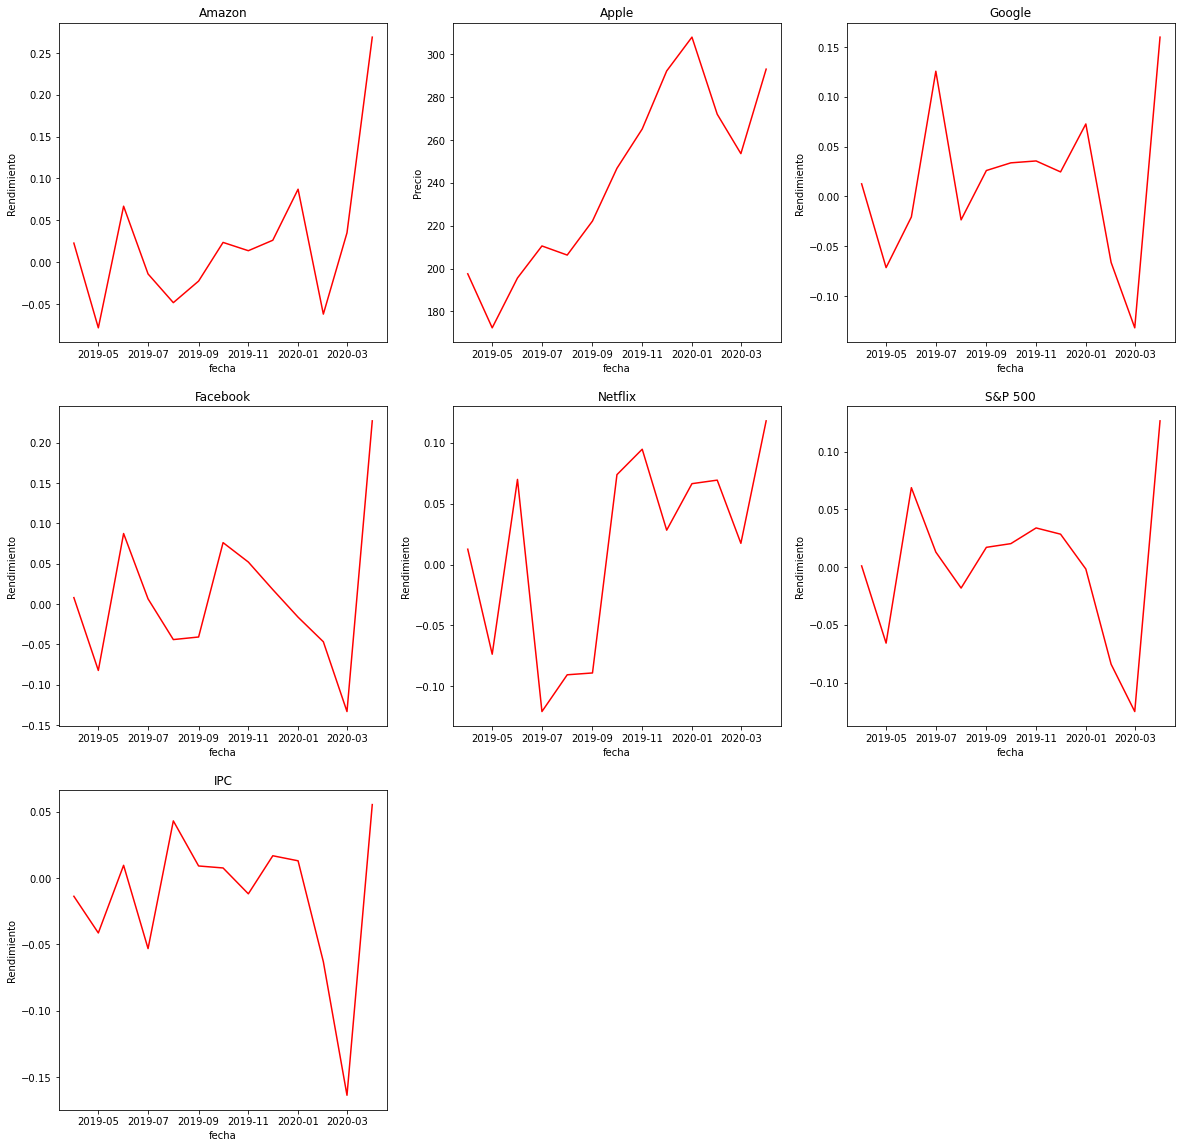

In [24]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)

grafosimple(ax1,amazon,'Amazon',2)
grafosimple(ax2,apple,'Apple',1)
grafosimple(ax3,google,'Google',2)
grafosimple(ax4,facebook,'Facebook',2)
grafosimple(ax5,netflix,'Netflix',2)
grafosimple(ax6,sp500,'S&P 500',2)
grafosimple(ax7,ipc,'IPC',2)

## Forecast

![tittle](Images/forecast.jpg)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [31]:
tickerSymbol = '^GSPC'
tickerData = yf.Ticker(tickerSymbol)
sp500_close = tickerData.history(period='1mo', start='2005-04-1', end='2020-04-05') #‘1d’ (daily), ‘1mo’ (monthly), ‘1y’ (yearly)
sp500_close 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2005-04-01,1180.59,1189.80,1169.91,1172.92,2168690000,0,0
2005-04-04,1172.79,1178.61,1167.72,1176.12,2079770000,0,0
2005-04-05,1176.12,1183.56,1176.12,1181.39,1870800000,0,0
2005-04-06,1181.39,1189.34,1181.39,1184.07,1797400000,0,0
2005-04-07,1184.07,1191.88,1183.81,1191.14,1900620000,0,0
...,...,...,...,...,...,...,...
2020-03-30,2558.98,2631.80,2545.28,2626.65,5746220000,0,0
2020-03-31,2614.69,2641.39,2571.15,2584.59,6568290000,0,0
2020-04-01,2498.08,2522.75,2447.49,2470.50,5947900000,0,0


Text(0, 0.5, 'precio')

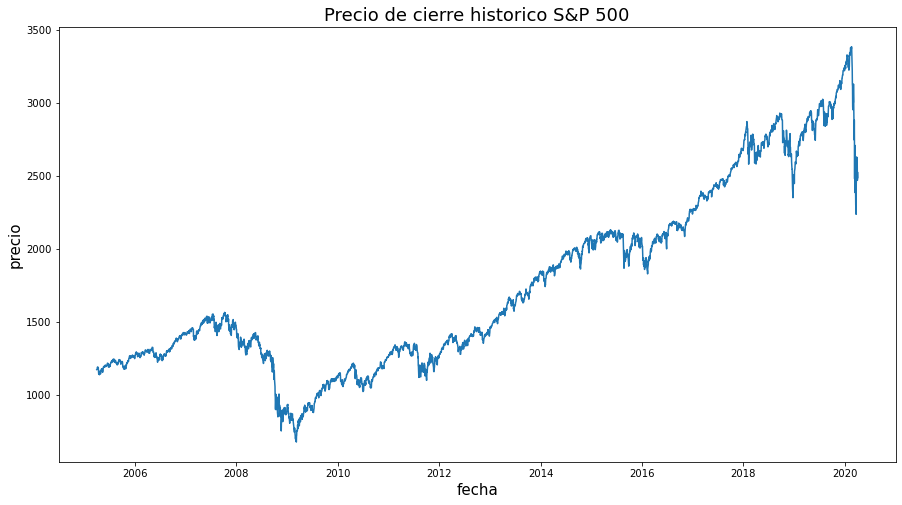

In [32]:
plt.figure(figsize=(15,8))
plt.title('Precio de cierre historico S&P 500',fontsize = 18)
plt.plot(sp500_close['Close'])
plt.xlabel('fecha',fontsize = 15)
plt.ylabel('precio',fontsize = 15)

### Preparar la informacion para entrenar modelos

Filtrar 'Close' y convertir a numpy

In [33]:
sp500_close = sp500_close.filter(['Close'])
sp500_np = sp500_close.values
type(sp500_np)

numpy.ndarray

longitud de entrenamiento

In [34]:
longitud_entrenamiento = int(len(sp500_np)*.8)
longitud_entrenamiento

3023

Normalizado

In [35]:
escalado = MinMaxScaler(feature_range=(0,1))
sp500_norm = escalado.fit_transform(sp500_np)

Crear el dataset de entrenamiento

In [36]:
train_data = sp500_norm[0:longitud_entrenamiento,:]

dividir en x_train y y_train (2 ejecuciones)

In [42]:
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) 
    y_train.append(train_data[i,0]) 

convertir a numpy

In [44]:
x_train,y_train = np.array(x_train),np.array(y_train)

### crear y entrenar modelo de regresion lineal

In [45]:
lr_model = LinearRegression()

In [46]:
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Crear el dataset de prueba

In [78]:
test_data = sp500_norm[longitud_entrenamiento - 60:,:]

dividir en x_test y y_test

In [79]:
x_test = []
y_test = sp500_np[longitud_entrenamiento:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [80]:
x_test = np.array(x_test)

In [81]:
lr_predic = lr_model.predict(x_test)

Quitar normalizado

In [82]:
lr_predic = np.reshape(lr_predic,(lr_predic.shape[0],1))
lr_predic.shape

(756, 1)

In [83]:
lr_predic = escalado.inverse_transform(lr_predic)

confianza del modelo

**Raíz de la Desviación Cuadrática Media (RMSE)**

In [86]:
rmse = np.sqrt( np.mean(lr_predic - y_test)**2)
rmse

0.5371116940874398

Graficas

In [87]:
entrenamiento = sp500_close[:longitud_entrenamiento]
validacion = sp500_close[longitud_entrenamiento:]
validacion['Predicciones']= lr_predic

C:\Users\af673\Anaconda3\envs\proyect_fin\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


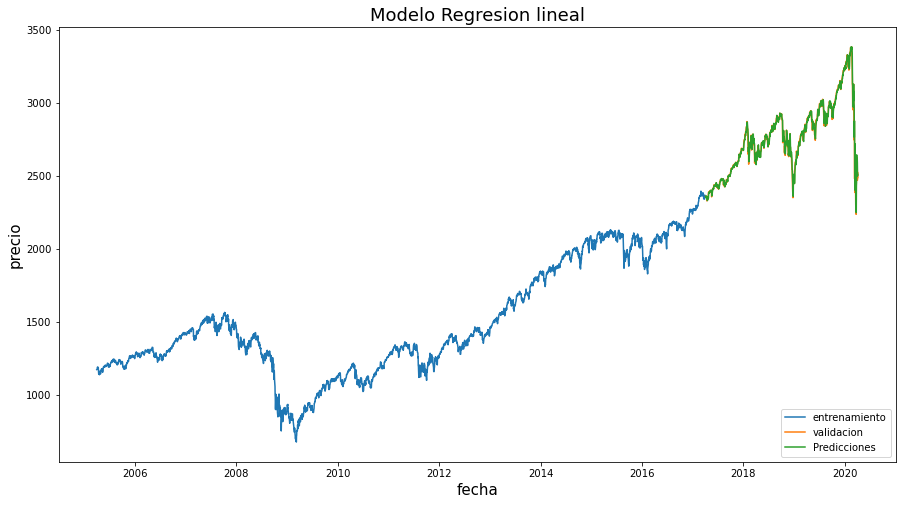

In [88]:
plt.figure(figsize=(15,8))
plt.title('Modelo Regresion lineal',fontsize = 18)
plt.xlabel('fecha',fontsize = 15)
plt.ylabel('precio',fontsize = 15)
plt.plot(entrenamiento['Close'])
plt.plot(validacion[['Close','Predicciones']])
plt.legend(['entrenamiento','validacion','Predicciones'],loc = 'lower right')
plt.show()

In [89]:
validacion

,Close,Predicciones
Date,,
2017-04-04,2360.16,2357.916974
2017-04-05,2352.95,2356.142105
2017-04-06,2357.49,2352.340936
2017-04-07,2355.54,2360.684705
2017-04-10,2357.16,2356.810038
...,...,...
2020-03-30,2626.65,2513.425213
2020-03-31,2584.59,2617.323715
2020-04-01,2470.50,2589.102694


### crear y entrenar modelo SVR

In [90]:
svr_model = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1,)
svr_model.fit(x_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Prediccion y graficas**

In [93]:
svr_predict = svr_model.predict(x_test)
svr_predict

array([0.54049959, 0.54064254, 0.54077141, 0.5409112 , 0.54103572,
       0.54117687, 0.54129522, 0.54139105, 0.54143562, 0.54153703,
       0.54160847, 0.54167792, 0.54177957, 0.54184473, 0.5419787 ,
       0.54214851, 0.54232258, 0.54251197, 0.54268006, 0.54286165,
       0.54301647, 0.54316439, 0.54330341, 0.54344668, 0.54358222,
       0.54368861, 0.54378743, 0.54386055, 0.54391947, 0.54400439,
       0.54408542, 0.5440479 , 0.54403725, 0.54405342, 0.54409929,
       0.54414772, 0.54420395, 0.54428232, 0.54437757, 0.54445382,
       0.54453222, 0.54465187, 0.5447929 , 0.54492577, 0.54503573,
       0.54514829, 0.54526858, 0.54537339, 0.5454623 , 0.5455858 ,
       0.54569611, 0.54580852, 0.54590449, 0.54602504, 0.54611896,
       0.54621141, 0.54629983, 0.54639866, 0.54649719, 0.54654279,
       0.54663673, 0.54668883, 0.54675104, 0.54682381, 0.54690673,
       0.54695462, 0.5470224 , 0.54709407, 0.54716399, 0.54726481,
       0.54736974, 0.54748493, 0.54758277, 0.54767235, 0.54777

Quitar normalizado

In [94]:
svr_predict = np.reshape(svr_predict,(svr_predict.shape[0],1))
svr_predict = escalado.inverse_transform(svr_predict)

**Raíz de la Desviación Cuadrática Media (RMSE)**

In [96]:
rmse = np.sqrt( np.mean(svr_predict - y_test)**2)
rmse

662.3684697997143

Graficas

In [99]:
validacion['Predicciones']= svr_predict

C:\Users\af673\Anaconda3\envs\proyect_fin\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


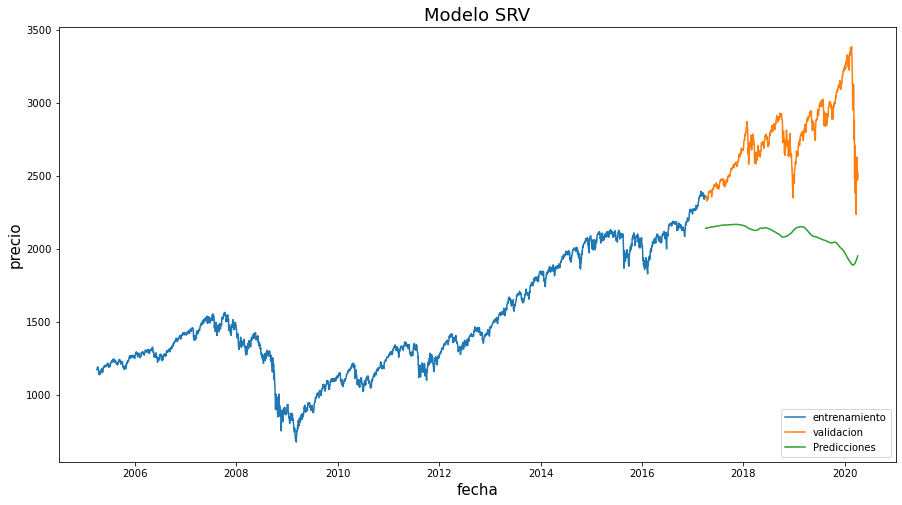

In [100]:
plt.figure(figsize=(15,8))
plt.title('Modelo SRV',fontsize = 18)
plt.xlabel('fecha',fontsize = 15)
plt.ylabel('precio',fontsize = 15)
plt.plot(entrenamiento['Close'])
plt.plot(validacion[['Close','Predicciones']])
plt.legend(['entrenamiento','validacion','Predicciones'],loc = 'lower right')
plt.show()

In [101]:
validacion

,Close,Predicciones
Date,,
2017-04-04,2360.16,2141.078494
2017-04-05,2352.95,2141.465842
2017-04-06,2357.49,2141.815035
2017-04-07,2355.54,2142.193809
2017-04-10,2357.16,2142.531200
...,...,...
2020-03-30,2626.65,1935.779686
2020-03-31,2584.59,1939.704102
2020-04-01,2470.50,1943.577054
